<h1 style="text-align:center; color:#008080;">Preprocessing with Local Binary Patterns<h1>
<hr style="height:1px;">

<h2 style="text-align:center; color:green;">Initialisation Steps</h2>
<hr>

<h3>Loading Dependencies</h3>

In [1]:
import PIL
from skimage.feature import local_binary_pattern
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import os

<h3>Path Constants</h3>

In [2]:
# Train Parent Path
train_path='../asl_alphabet_train/'

In [3]:
# Train Labels
train_labels=os.listdir(train_path)

In [4]:
# Sample Image
sample_img=train_path+'A/A1.jpg'
sample_render=PIL.Image.open(sample_img)
sample_grey=sample_render.convert('L')
sample_arr=np.asarray(sample_grey)

<h3>Sample Image</h3>

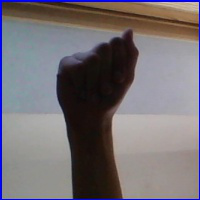

In [5]:
sample_render

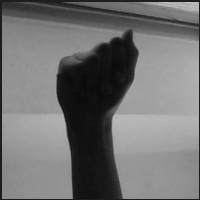

In [6]:
sample_grey

<h2 style="text-align:center;color:green;">Local Binary Pattern Transformation</h2>
<hr>

In [7]:
sample_lbp=local_binary_pattern(sample_arr,8,1,'uniform')
sample_lbp=np.uint8((sample_lbp/sample_lbp.max())*255)

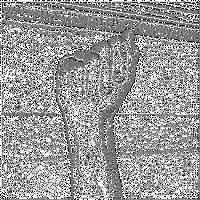

In [8]:
sample_conversion=PIL.Image.fromarray(sample_lbp)
sample_conversion

In [9]:
# calculating historgram
sample_hist,_=np.histogram(sample_lbp,8)
sample_hist=np.array(sample_hist,dtype=float)

In [10]:
# calculating energy and entropy from PDF
sample_prob=np.divide(sample_hist,np.sum(sample_hist))
sample_energy=np.sum(sample_prob**2)
sample_entropy=-np.sum(np.multiply(sample_prob,np.log2(sample_prob)))
print('Entropy ',sample_entropy)
print('Energy', sample_energy)

Entropy  2.7286642342935346
Energy 0.17180657875


<h2 style="text-align:center; color:green">Replicating for entire Training set</h2>
<hr>

In [11]:
def compute_lbp(image):
    lbp=local_binary_pattern(image,8,1,'uniform')
    lbp=np.uint8((lbp/lbp.max())*255)
    hist,_=np.histogram(lbp,8)
    hist=np.array(hist,dtype=float)
    prob=np.divide(hist,np.sum(hist))
    energy=np.sum(prob**2)
    entropy=-np.sum(np.multiply(prob,np.log2(prob)))
    return energy,entropy

In [12]:
def load_img(path):
    render=PIL.Image.open(path)
    render=render.convert('L')
    return np.asarray(render)

In [13]:
lbp_datafame=pd.DataFrame(columns=['Energy', 'Entropy', 'Label'])

In [15]:
for label in os.listdir(train_path):
    for image_name in os.listdir(train_path+'/'+label+'/'):
        image_path=train_path+'/'+label+'/'+image_name
        image_arr=load_img(image_path)
        lbp=compute_lbp(image_arr)
        lbp_datafame.loc[len(lbp_datafame)]=[image_energy,image_entropy,label]
    print('-------------------------------------------------------------------')
    print('Dataframe Write Completed for ',label)
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
Dataframe Write Completed for  space
-------------------------------------------------------------------
Dataframe Write Completed for  D
-------------------------------------------------------------------
Dataframe Write Completed for  T
-------------------------------------------------------------------
Dataframe Write Completed for  L
-------------------------------------------------------------------
Dataframe Write Completed for  I
-------------------------------------------------------------------
Dataframe Write Completed for  U
-------------------------------------------------------------------
Dataframe Write Completed for  del
-------------------------------------------------------------------
Dataframe Write Completed for  nothing
-------------------------------------------------------------------
Dataframe Write Completed for  A
-------------------------------------------------------------------
Dataframe W

In [16]:
lbp_datafame.to_csv('lbp_df.csv', sep=',',index=False)